In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('netflix_titles.csv')
dc=df.copy()
dc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

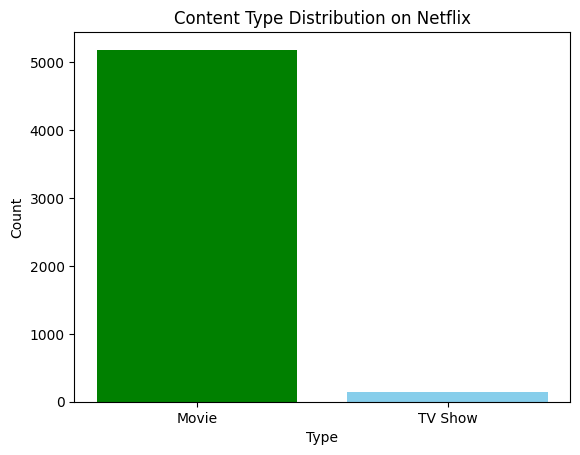

<Figure size 640x480 with 0 Axes>

In [37]:
types=df['type'].value_counts()
plt.bar(types.index,types.values,color=['green','skyblue'])
plt.title('Content Type Distribution on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
plt.savefig('content_type_distribution.png')

In [40]:
# top 10 countries producing most content
country_counts=df['country'].value_counts().head(10)
country_counts

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64

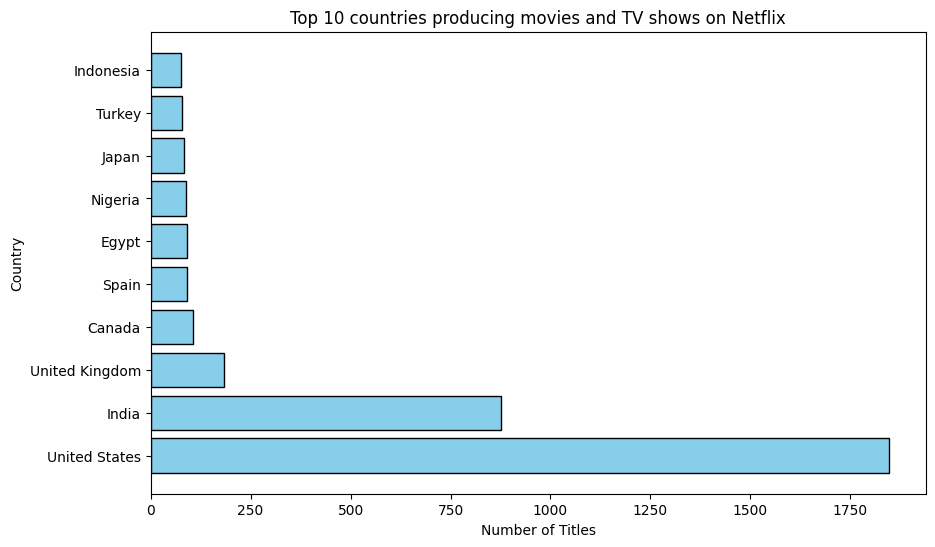

In [42]:
plt.figure(figsize=(10,6))
plt.barh(country_counts.index,country_counts.values,color='skyblue',edgecolor='black')
plt.title('Top 10 countries producing movies and TV shows on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig('top_10_countries_movie_and_tv.png')
plt.show()

In [46]:
top_10_directors=df['director'].value_counts().head(10)
top_10_directors

director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Name: count, dtype: int64

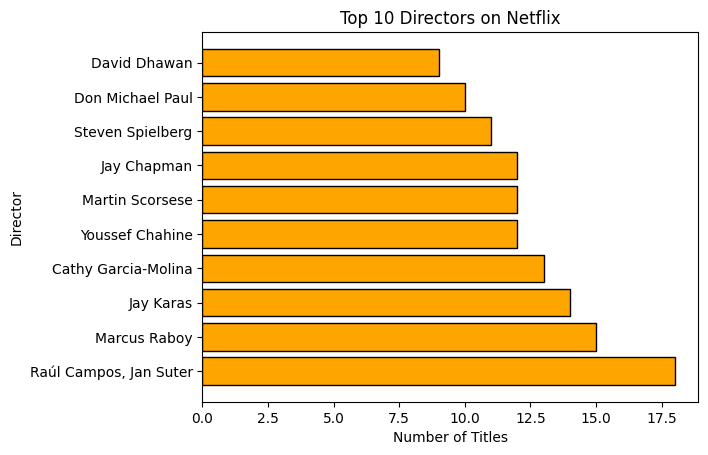

In [48]:
plt.barh(top_10_directors.index,top_10_directors.values,color='orange',edgecolor='black')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.savefig('top_10_directors.png')
plt.show()

In [55]:
top_10_rating_counts=df['rating'].value_counts().head()
top_10_rating_counts

rating
TV-MA    1822
TV-14    1214
R         778
PG-13     470
TV-PG     431
Name: count, dtype: int64

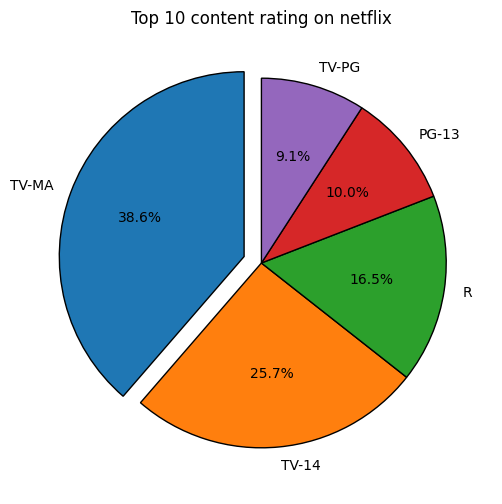

In [60]:
plt.figure(figsize=(8,6))
plt.pie(top_10_rating_counts.values,labels=top_10_rating_counts.index,autopct='%1.1f%%',startangle=90,explode=(0.1,0,0,0,0),wedgeprops={'edgecolor':'black'})
plt.title('Top 10 content rating on netflix')
plt.savefig('top_10_content_rating.png')


In [62]:
# in which year more movies and tv shows were released
df['release_year'].value_counts().head(10)


release_year
2017    657
2018    648
2016    577
2019    519
2020    442
2015    349
2014    242
2013    197
2012    163
2021    161
Name: count, dtype: int64

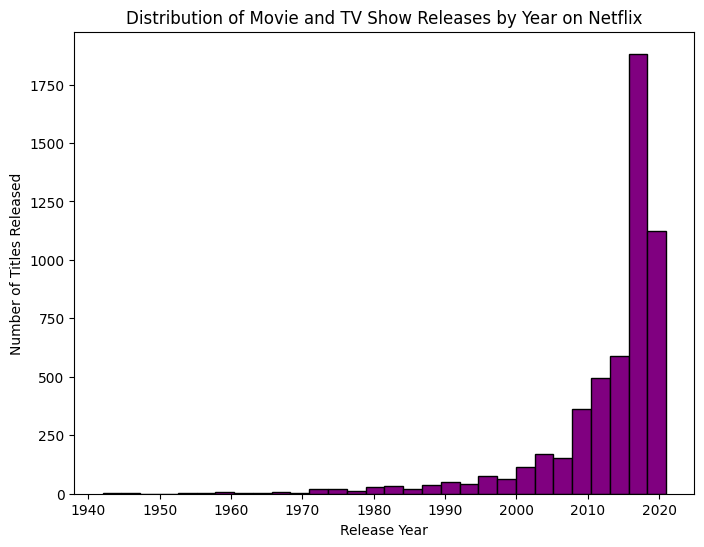

In [66]:
plt.figure(figsize=(8,6))
plt.hist(df['release_year'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie and TV Show Releases by Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.savefig('release_year_distribution.png')
plt.show()

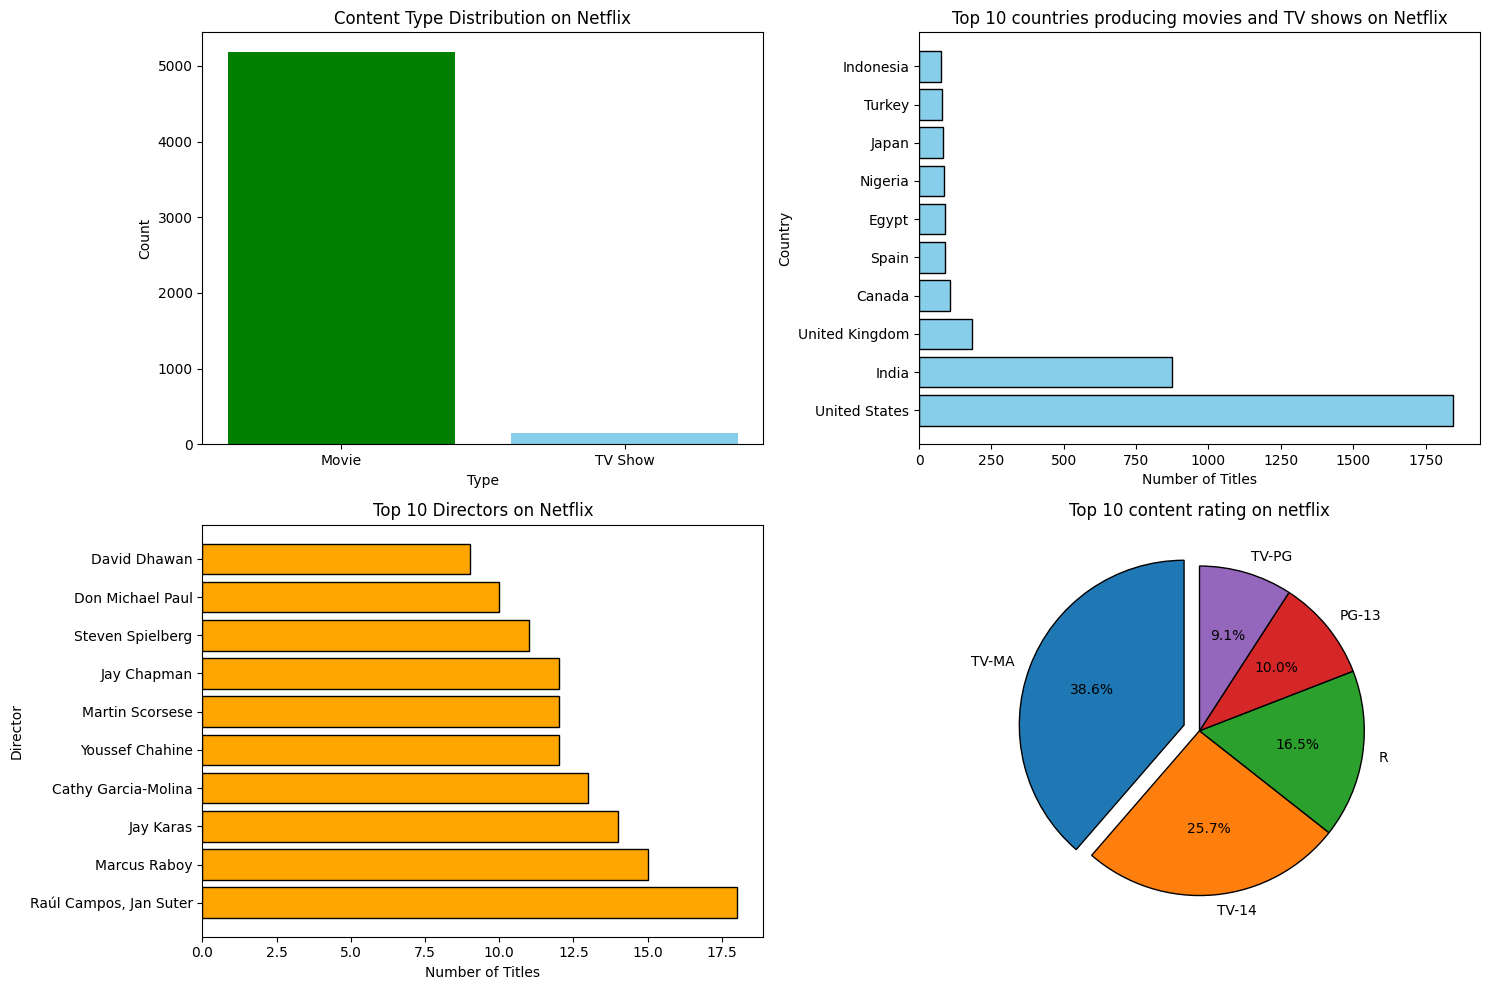

In [67]:
# now making the subplots

fig,ax1=plt.subplots(2,2,figsize=(15,10))
ax1[0,0].bar(types.index,types.values,color=['green','skyblue'])
ax1[0,0].set_title('Content Type Distribution on Netflix')
ax1[0,0].set_xlabel('Type')
ax1[0,0].set_ylabel('Count')
ax1[0,1].barh(country_counts.index,country_counts.values,color='skyblue',edgecolor='black')
ax1[0,1].set_title('Top 10 countries producing movies and TV shows on Netflix')
ax1[0,1].set_xlabel('Number of Titles')
ax1[0,1].set_ylabel('Country')
ax1[1,0].barh(top_10_directors.index,top_10_directors.values,color='orange',edgecolor='black')
ax1[1,0].set_title('Top 10 Directors on Netflix')
ax1[1,0].set_xlabel('Number of Titles')
ax1[1,0].set_ylabel('Director')
ax1[1,1].pie(top_10_rating_counts.values,labels=top_10_rating_counts.index,autopct='%1.1f%%',startangle=90,explode=(0.1,0,0,0,0),wedgeprops={'edgecolor':'black'})
ax1[1,1].set_title('Top 10 content rating on netflix')
plt.tight_layout()
plt.savefig('netflix_analysis_subplots.png')
plt.show()